# 2o Trabalho de PSD

### Número do Grupo : `10`

`André Silveira Sousa		   RA: 628239`

`Juan Henrique dos Santos  RA: 594946`

`Vinicius Gonçalves Arruda RA: 744355`

###O presente trabalho trata sobre a comparação entre as convoluções linear (acíclica) e cíclica como aplicações da Transformada Discreta de Fourier, aqui aplicadas como a Transformada Rápida de Fourier (FFT)

`Todas as funções apresentadas são baseadas no website recomendado pelo professor:` https://www.dsprelated.com/freebooks/sasp/Convolution_Short_Signals.html

In [67]:
!pip install scikit-dsp-comm
import sk_dsp_comm.sigsys as ss

import numpy as np
from matplotlib import pylab
from pylab import *

import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

###Sinais para a aplicação das funções:

In [68]:
# n = pontos no dominio do tempo (0 a 5 por exemplo)
# n = np.arange(0,5) -- nao precisa mais, so qd fosse usar as funções do scipy

# x = nosso sinal curto de entrada
# x = (1, 2, 3, 4) 
x = np.array([1, 2, 3, 4])

# h = a resposta impulsiva do nosso sistema
# h = (1, 1, 1)
h = np.array([1, 1, 1])

print(x)
print(h)

# pegando os tamanhos dos sinais:
len_x = len(x)
len_h = len(h)


[1 2 3 4]
[1 1 1]


##Convolução linear direta através do numpy vs. Convolução linear através da função FFT do método de Cooley-Tukey

In [83]:
# A funcao 'convolve' presente na biblioteca realiza a convolucao linear (aciclica) de duas sequencias (unidimensional)
print("Convolucao linear direta atraves de numpy.convolve: ")
yc1 = np.convolve(x, h, 'full')
print(yc1)
print("Comprimento do sinal convoluido: ", len(yc1))
print("----------")

# Construindo a convolucao atraves do metodo de Cooley-Tukey

#len_fft = calcula o tamanho do vetor para fft se baseando na potencia de 2 mais proxima da concatenação de x com h
len_fft = int(pow(2, ceil(log2(abs(len_x + len_h - 1)))))

#x_padd e h_padd são os vetores x e h concatenados com um vetor de 0 até o comprimento len_fft
len_xfft = len_fft - len_x
len_hfft = len_fft - len_h
x_zero = np.zeros((len_xfft,) , dtype=int)
h_zero = np.zeros((len_hfft,) , dtype=int)
x_padd = concatenate((x, x_zero))
h_padd = concatenate((h, h_zero))

#print(x_padd)
#print(h_padd)

#utilizando o algoritmo de fft do numpy para transformar x e h para o dominio da frequencia
x_freq = np.fft.fft(x_padd)
h_freq = np.fft.fft(h_padd)

#yc2 no dominio da frequencia é a multiplicação dos vetores x e y (item a item)
yc2_freq = x_freq * h_freq

#utilizando a transformada inversa ifft do numpy para passar yc2 para o dominio do tempo
#obs: yc2 volta com valores complexos
yc2 = np.fft.ifft(yc2_freq)

print("Convolucao no dominio da frequencia com FFT: ")
print(yc2.real) 
print("Comprimento do sinal convoluido: ", len(yc2.real))




Convolucao linear direta atraves de numpy.convolve: 
[1 3 6 9 7 4]
Comprimento do sinal convoluido:  6
----------
Convolucao no dominio da frequencia com FFT: 
[1. 3. 6. 9. 7. 4. 0. 0.]
Comprimento do sinal convoluido:  8


##Exemplo 1: Aplicação do método FFT em Filtro Passa-Baixa

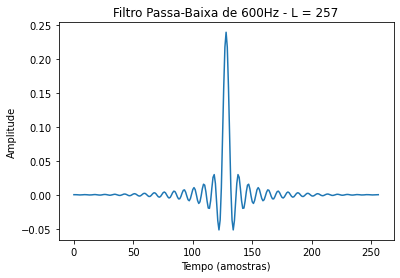

In [71]:
# Passo 1: Desenvolvendo o filtro:

#Dados do sinal

f = np.array([440, 880, 1000, 2000]) #frequencias
M = 256
Fs = 5000

#adicionando senoides

sinal = np.zeros(M)
n = arange(0, M)

for fk in f:
  sinal = sinal + np.sin(2*np.pi*n*fk/Fs)

#Desenvolvendo o filtro:

L = 257 #largura da banda
fc = 600 #frequencia de corte
L2 = int((L-1)/2)

h_supp = arange(-L2, L2+1)
h_ideal = (2*fc/Fs)*np.sinc(2*fc*h_supp/Fs)
filtro_passabaixa = (np.hamming(L)).transpose() * h_ideal

#Graficamente:

plt.title('Filtro Passa-Baixa de 600Hz - L = 257')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (amostras)')
plt.plot(filtro_passabaixa)
plt.show()



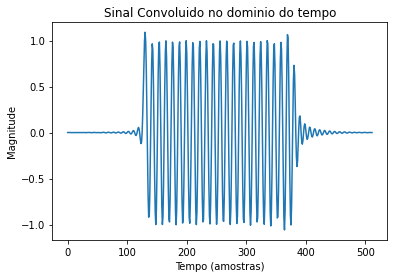

In [82]:
# Passo 2: Usando FFT

#organizando os vetores:

N_fft = int(pow(2, ceil(log2(abs(L+M-1)))))

n_sinal = N_fft - M
n_filtro = N_fft - L
sinal_zero = np.zeros(n_sinal, dtype=int)
filtro_zero = np.zeros(n_filtro, dtype=int)

sinal_padd = np.concatenate([sinal, sinal_zero])
filtro_padd = np.concatenate([filtro_passabaixa, filtro_zero])

#calculo da convolucao na frequencia:

sinal_freq = np.fft.fft(sinal_padd)
filtro_freq = np.fft.fft(filtro_padd)

y_freq = sinal_freq * filtro_freq

y = np.fft.ifft(y_freq)
y = y.real

#Graficamente:

plt.title('Sinal Convoluido no dominio do tempo')
plt.ylabel('Magnitude')
plt.xlabel('Tempo (amostras)')
plt.plot(y)
plt.show()

'''
OBS: não conseguimos entender como plotar a filtragem atraves do site
'''